In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns
from scipy import stats

sns.reset_defaults()

In [9]:
df_D = [0.025, 0.022, 0.024, 0.024, 0.023, 0.031, 0.037, 0.028, 0.024, 0.019, 0.025, 0.027, 0.019, 0.02, 0.025, 0.03, 0.019, 0.023, 0.017, 0.016, 0.027, 0.931, 0.846, 0.979, 0.871, 0.941, 0.916, 0.928, 0.919, 0.863, 0.871, 0.889, 0.908, 0.946, 0.893, 0.98, 0.825, 0.939, 0.919, 0.979, 0.63, 0.033, 0.029, 0.017, 0.032, 0.029, 0.026, 0.019, 0.036, 0.023, 0.028, 0.041, 0.024, 0.033, 0.029, 0.022, 0.036, 0.021, 0.049, 0.036, 0.034, 0.042, 0.024, 0.028, 0.029, 0.034, 0.021, 0.035, 0.023, 0.03, 0.021, 0.027, 0.036, 0.019, 0.026, 0.024, 0.025, 0.029, 0.021, 0.024, 0.021, 0.027, 0.016, 0.027, 0.029, 0.024, 0.029, 0.032, 0.024, 0.013, 0.018, 0.019, 0.031, 0.023, 0.022, 0.041, 0.014, 0.033, 0.023, 0.013, 0.018, 0.038, 0.024, 0.023, 0.017, 0.053, 0.023, 0.022, 0.009, 0.036, 0.015, 0.014, 0.028, 0.036, 0.022, 0.032, 0.031, 0.029, 0.035, 0.027, 0.042, 0.036, 0.024, 0.021, 0.023, 0.017, 0.019, 0.035, 0.023, 0.027, 0.021, 0.015, 0.033, 0.025, 0.016, 0.039, 0.014, 0.034, 0.015, 0.04, 0.014, 0.004, 0.02, 0.044, 0.023, 0.04, 0.013, 0.035, 0.038, 0.015, 0.032, 0.018, 0.023, 0.025, 0.022, 0.03, 0.01, 0.03, 0.017, 0.028, 0.032, 0.024, 0.036, 0.028, 0.026, 0.017, 0.039, 0.019, 0.021, 0.025, 0.019, 0.022, 0.027, 0.02, 0.03, 0.032, 0.033, 0.013, 0.028, 0.028, 0.028, 0.021, 0.036, 0.817, 0.832, 0.7, 0.824, 0.814, 0.813, 0.878, 0.853, 0.855, 0.82, 0.757, 0.828, 0.81, 0.809, 0.801, 0.74, 0.828, 0.732, 0.876, 0.817, 0.041, 0.017, 0.026, 0.017, 0.016, 0.018, 0.02, 0.037, 0.016, 0.03, 0.028, 0.035, 0.025, 0.027, 0.032, 0.027, 0.028, 0.032, 0.024, 0.03, 0.024, 0.022, 0.022, 0.025, 0.019, 0.024, 0.015, 0.025, 0.019, 0.014, 0.024, 0.02, 0.022, 0.019, 0.021, 0.037, 0.036, 0.026, 0.023, 0.048, 0.024, 0.03, 0.023, 0.023, 0.026, 0.043, 0.028, 0.047, 0.025, 0.025, 0.034, 0.019, 0.033, 0.033, 0.039, 0.031, 0.027, 0.033, 0.022, 0.049, 0.044, 0.028, 0.033, 0.027, 0.02, 0.022, 0.017, 0.029, 0.039, 0.039, 0.032, 0.037, 0.016, 0.027, 0.019, 0.028, 0.029, 0.019, 0.033, 0.024, 0.039, 0.037, 0.03, 0.011, 0.023, 0.024, 0.033, 0.039, 0.05, 0.032, 0.027, 0.019, 0.029, 0.019, 0.023, 0.027, 0.034, 0.018, 0.031, 0.024, 0.018, 0.03, 0.027, 0.025, 0.026, 0.027, 0.025, 0.028, 0.029, 0.017, 0.023, 0.033, 0.03, 0.019, 0.027, 0.016, 0.03, 0.024, 0.028, 0.036, 0.021, 0.025, 0.029, 0.028, 0.016, 0.03, 0.026, 0.031, 0.015, 0.03, 0.018, 0.034, 0.028, 0.019, 0.02, 0.027, 0.018, 0.026, 0.027, 0.029, 0.028, 0.047, 0.703, 0.708, 0.661, 0.707, 0.682, 0.743, 0.646, 0.647, 0.706, 0.689, 0.717, 0.674, 0.685, 0.647, 0.68, 0.667, 0.669, 0.688, 0.645, 0.711, 0.683, 0.033, 0.03, 0.029, 0.02, 0.022, 0.032, 0.013, 0.036, 0.038, 0.024, 0.025, 0.028, 0.035, 0.037, 0.026, 0.033, 0.021, 0.021, 0.026, 0.022, 0.036, 0.026, 0.025, 0.046, 0.049, 0.045, 0.032, 0.027, 0.021, 0.018, 0.028, 0.034, 0.029, 0.009, 0.031, 0.03, 0.024, 0.015, 0.033, 0.029, 0.02, 0.019, 0.025, 0.011, 0.032, 0.021, 0.018, 0.031, 0.017, 0.028, 0.012, 0.026, 0.02, 0.02, 0.039, 0.027, 0.027, 0.01, 0.034, 0.027, 0.031, 0.031, 0.029, 0.025, 0.028, 0.024, 0.042, 0.025, 0.017, 0.025, 0.018, 0.02, 0.022, 0.042, 0.02, 0.034, 0.034, 0.032, 0.026, 0.022, 0.022, 0.027, 0.045, 0.031, 0.025, 0.017, 0.038, 0.031, 0.035, 0.022, 0.033, 0.016, 0.028, 0.03, 0.03, 0.031, 0.013, 0.029, 0.021, 0.042, 0.036, 0.028, 0.024, 0.036, 0.015, 0.031, 0.029, 0.009, 0.019, 0.028, 0.033, 0.025, 0.025, 0.015, 0.029, 0.05, 0.02, 0.036, 0.031, 0.028, 0.032, 0.026, 0.028, 0.035, 0.033, 0.014, 0.021, 0.035, 0.015, 0.044, 0.017, 0.029, 0.022, 0.028, 0.02, 0.026, 0.025, 0.029, 0.031, 0.034, 0.025, 0.026, 0.017, 0.027, 0.502, 0.573, 0.55, 0.525, 0.542, 0.562, 0.537, 0.536, 0.592, 0.555, 0.489, 0.557, 0.611, 0.566, 0.547, 0.487, 0.495, 0.532, 0.534, 0.555, 0.03, 0.02, 0.019, 0.029, 0.028, 0.037, 0.031, 0.019, 0.024, 0.027, 0.023, 0.028, 0.025, 0.029, 0.028, 0.03, 0.031, 0.024, 0.048, 0.039, 0.02, 0.03, 0.035, 0.025, 0.017, 0.024, 0.032, 0.029, 0.04, 0.033, 0.027, 0.023, 0.032, 0.037, 0.026, 0.02, 0.021, 0.028, 0.021, 0.031, 0.036, 0.037, 0.028, 0.032, 0.035, 0.036, 0.023, 0.03, 0.024, 0.029, 0.042, 0.022, 0.024, 0.035, 0.045, 0.025, 0.032, 0.034, 0.023, 0.03, 0.03, 0.039, 0.035, 0.03, 0.026, 0.025, 0.024, 0.029, 0.022, 0.038, 0.035, 0.014, 0.026, 0.015, 0.022, 0.035, 0.03, 0.028, 0.013, 0.017, 0.027, 0.025, 0.026, 0.036, 0.018, 0.032, 0.037, 0.023, 0.025, 0.02, 0.024, 0.029, 0.028, 0.026, 0.029, 0.032, 0.022, 0.022, 0.034, 0.026, 0.016, 0.027, 0.042, 0.026, 0.018, 0.033, 0.026, 0.026, 0.019, 0.013, 0.041, 0.022, 0.037, 0.027, 0.018, 0.029, 0.03, 0.041, 0.014, 0.023, 0.038, 0.014, 0.031, 0.029, 0.026, 0.023, 0.048, 0.041, 0.017, 0.023, 0.024, 0.041, 0.035, 0.013, 0.029, 0.028, 0.027, 0.018, 0.03, 0.028, 0.024, 0.026, 0.03, 0.038, 0.375, 0.389, 0.47, 0.426, 0.413, 0.428, 0.393, 0.426, 0.431, 0.429, 0.451, 0.382, 0.428, 0.46, 0.508, 0.432, 0.397, 0.38, 0.386, 0.427, 0.025, 0.027, 0.034, 0.026, 0.037, 0.049, 0.034, 0.039, 0.04, 0.045, 0.046, 0.028, 0.036, 0.037, 0.02, 0.023, 0.034, 0.023, 0.034, 0.026, 0.028, 0.039, 0.027, 0.022, 0.021, 0.036, 0.029, 0.028, 0.033, 0.051, 0.033, 0.038, 0.025, 0.052, 0.02, 0.022, 0.029, 0.03, 0.037, 0.026, 0.033, 0.02, 0.036, 0.03, 0.031, 0.027, 0.017, 0.026, 0.036, 0.045, 0.026, 0.018, 0.025, 0.026, 0.028, 0.031, 0.023, 0.014, 0.024, 0.033, 0.028, 0.016, 0.033, 0.029, 0.019, 0.028, 0.03, 0.033, 0.017, 0.013, 0.022, 0.034, 0.035, 0.027, 0.025, 0.015, 0.031, 0.022, 0.023, 0.02, 0.05, 0.04, 0.02, 0.028, 0.038, 0.025, 0.029, 0.03, 0.017, 0.019, 0.021, 0.031, 0.042, 0.021, 0.03, 0.031, 0.022, 0.021, 0.023, 0.021, 0.018, 0.036, 0.026, 0.023, 0.024, 0.022, 0.03, 0.046, 0.017, 0.029, 0.039, 0.035, 0.023, 0.045, 0.025, 0.034, 0.039, 0.037, 0.018, 0.04, 0.015, 0.032, 0.012, 0.025, 0.029, 0.025, 0.029, 0.031, 0.024, 0.036, 0.026, 0.024, 0.015, 0.027, 0.033, 0.02, 0.026, 0.021, 0.016, 0.025, 0.03, 0.026, 0.019, 0.037, 0.286, 0.234, 0.294, 0.318, 0.28, 0.251, 0.287, 0.27, 0.272, 0.245, 0.267, 0.297, 0.261, 0.29, 0.298, 0.319, 0.255, 0.31, 0.26, 0.277, 0.269, 0.036, 0.025, 0.034, 0.03, 0.02, 0.02, 0.026, 0.038, 0.04, 0.028, 0.02, 0.036, 0.022, 0.024, 0.021, 0.038, 0.033, 0.016, 0.019, 0.024, 0.024, 0.035, 0.028, 0.03, 0.041, 0.03, 0.031, 0.029, 0.039, 0.032, 0.017, 0.024, 0.033, 0.022, 0.019, 0.019, 0.026, 0.021, 0.025, 0.023, 0.037, 0.018, 0.018, 0.025, 0.024, 0.028, 0.035, 0.036, 0.023, 0.014, 0.039, 0.027, 0.021, 0.031, 0.034, 0.024, 0.03, 0.025, 0.028, 0.037, 0.038, 0.039, 0.026, 0.017, 0.024, 0.033, 0.034, 0.025, 0.024, 0.016, 0.025, 0.025, 0.024, 0.023, 0.031, 0.028, 0.03, 0.025, 0.023, 0.03, 0.018, 0.026, 0.016, 0.015, 0.04, 0.026, 0.038, 0.037, 0.027, 0.017, 0.008, 0.028, 0.03, 0.03, 0.02, 0.025, 0.038, 0.026, 0.025, 0.036, 0.032, 0.022, 0.029, 0.043, 0.027, 0.017, 0.033, 0.027, 0.025, 0.028, 0.038, 0.02, 0.028, 0.031, 0.037, 0.032, 0.02, 0.024, 0.016, 0.033, 0.029, 0.034, 0.032, 0.032, 0.033, 0.032, 0.026, 0.026, 0.028, 0.026, 0.032, 0.028, 0.024, 0.024, 0.03, 0.02, 0.028, 0.024, 0.036, 0.02, 0.033, 0.026, 0.026, 0.036, 0.141, 0.132, 0.136, 0.139, 0.156, 0.138, 0.139, 0.139, 0.136, 0.174, 0.144, 0.141, 0.142, 0.138, 0.16, 0.139, 0.155, 0.172, 0.119, 0.137, 0.168, 0.022, 0.016, 0.031, 0.032, 0.04, 0.053, 0.022, 0.031, 0.028, 0.05, 0.034, 0.031, 0.022, 0.027, 0.032, 0.018, 0.022, 0.047, 0.04, 0.041, 0.029, 0.036, 0.023, 0.022, 0.027, 0.024, 0.022, 0.014, 0.032, 0.028, 0.032, 0.036, 0.037, 0.026, 0.041, 0.031, 0.039, 0.026, 0.013, 0.03, 0.02, 0.03, 0.016, 0.021, 0.027, 0.029, 0.029, 0.038, 0.025, 0.036, 0.028, 0.04, 0.026, 0.03, 0.035, 0.036, 0.023, 0.033, 0.032, 0.031, 0.021, 0.028, 0.033, 0.029, 0.019, 0.024, 0.032, 0.014, 0.037, 0.034, 0.047, 0.046, 0.02, 0.033, 0.031, 0.017, 0.037, 0.036, 0.022, 0.018, 0.032, 0.022, 0.036, 0.02, 0.035, 0.025, 0.021, 0.039, 0.02, 0.039, 0.038, 0.026, 0.034, 0.033, 0.031, 0.01, 0.019, 0.016, 0.016, 0.036, 0.031, 0.029, 0.018, 0.035, 0.02, 0.044, 0.03, 0.022, 0.028, 0.021, 0.028, 0.019, 0.025, 0.028, 0.026, 0.022, 0.041, 0.016, 0.017, 0.031, 0.025, 0.025, 0.022, 0.034, 0.033, 0.024, 0.022, 0.035, 0.022, 0.022, 0.016, 0.024, 0.021, 0.034, 0.022, 0.035, 0.029, 0.016, 0.024, 0.031, 0.027, 0.019, 0.026, 0.048, 0.014, 0.022, 0.032, 0.04, 0.041, 0.032, 0.032, 0.022, 0.025, 0.023, 0.035, 0.02, 0.014, 0.031, 0.03, 0.034, 0.044, 0.041, 0.026, 0.032, 0.02, 0.026, 0.019, 0.022, 0.026, 0.031, 0.047, 0.028, 0.035, 0.021, 0.038, 0.02, 0.021, 0.016, 0.052, 0.038, 0.028, 0.04, 0.018, 0.027, 0.034, 0.037, 0.03, 0.031, 0.031, 0.028, 0.037, 0.036, 0.027, 0.013, 0.037, 0.016, 0.03, 0.034, 0.038, 0.026, 0.022, 0.024, 0.03, 0.037, 0.034, 0.033, 0.042, 0.03, 0.05, 0.015, 0.031, 0.037, 0.024, 0.04, 0.02, 0.017, 0.021, 0.026, 0.024, 0.022, 0.03, 0.022, 0.027, 0.027, 0.013, 0.032, 0.033, 0.036]

In [2]:
def exp(x, A, tau, c):
    return A*np.exp(-x/tau) + c

In [3]:
data = pd.read_excel('WTvsD220N.xlsx')

In [10]:
t = np.array(data['Time, min'])
wt = np.array(data['wt-av'])
D = np.array(data['D220N-av'])-df_D

[2.32469035 2.09377919 7.90387926]
chi2 =  1.860713946734385
[2.20956641 2.94190236 7.74627551]
chi2 =  1.1793625455313892
[3.78329593 6.06203885 6.43261865]
chi2 =  1.0170476865048388
[2.84480538 3.53222821 6.6688821 ]
chi2 =  1.0281797218027926
[2.78223213 3.04269532 6.57617067]
chi2 =  1.3623719510792698
[2.29765991 2.57402883 6.75497992]
chi2 =  1.1464006112954324
[1.82574867 1.98407824 7.16672754]
chi2 =  2.5666500531082908


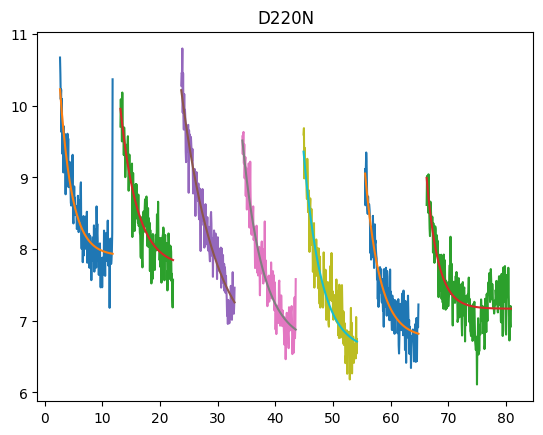

In [18]:
downs = [41, 203, 366, 530, 694, 859, 1024]
ups = [183, 345, 510, 674, 838, 1003, 1251]

ts = []
Ds = []

tau_D = []

for i in range(7):
    ts.append(t[downs[i]:ups[i]])
    Ds.append(D[downs[i]:ups[i]])
    
for i in range(7):
    popt, pcov = curve_fit(exp, ts[i]-ts[i][0], Ds[i], p0 = [2.98672414, 0.31539045, 6.78397223])
    print(popt)
    plt.plot(ts[i], Ds[i])
    plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
    tau_D.append(popt[1])
    chi = stats.chisquare(Ds[i], exp(ts[i]-ts[i][0], *popt))[0]
    print('chi2 = ',  chi)
plt.title('D220N')
plt.show()



[ 4.0227477   0.23603236 17.752517  ]
[ 5.43685506  0.18929667 17.39822572]
[ 5.96938512  0.42975662 17.42238799]
[ 1.05767612  0.43480143 17.16323087]
[ 3.4750602   0.09107545 18.04235038]
[ 2.69304179  0.17666723 18.17336304]
[ 1.07152055  0.1121217  17.9921653 ]


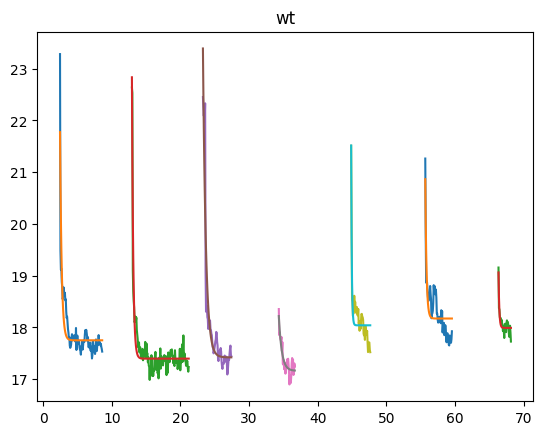

In [6]:
downs = [38, 200, 360, 531, 694, 861, 1026]
ups = [134, 329, 425, 568, 738, 922, 1055]

ts = []
wts = []

tau_wt=[]

for i in range(7):
    ts.append(t[downs[i]:ups[i]])
    wts.append(wt[downs[i]:ups[i]])

for i in range(7):
    popt, pcov = curve_fit(exp, ts[i]-ts[i][0], wts[i], p0 = [2.98672414, 0.31539045, 6.78397223])
    print(popt)
    plt.plot(ts[i], wts[i])
    plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
    tau_wt.append(popt[1])
plt.title('wt')
plt.show()


In [7]:
tau_D, tau_wt

([1.949244084178698,
  2.5218676083234595,
  3.6584741138556134,
  3.170696901265787,
  2.6090229014411888,
  2.4611338534984055,
  2.427135947504873],
 [0.23603236033205893,
  0.1892966721130408,
  0.42975661870525994,
  0.43480143282135514,
  0.09107544981144902,
  0.17666723236505652,
  0.11212169605002784])

In [8]:
def p_value(p):
    if ((0.05 < p) & (p <= 1)):
        return 'ns'
    elif ((0.01 < p) & (p <= 0.05)):
        return '*'
    elif ((0.001 < p) & (p <= 0.01)):
        return '**'
    elif ((0.0001 < p) & (p <= 0.001)):
        return '***'
    elif (p <= 0.0001):
        return '****'
p_value_vec = np.vectorize(p_value)

In [9]:
t, p = stats.ttest_rel(a=tau_wt, b=tau_D)
print(p, p_value(p))

8.511125341495196e-06 ****


In [10]:
xwt = []
xD = []
for i in range(7):
    xwt.append('wt')
    xD.append('D220N')

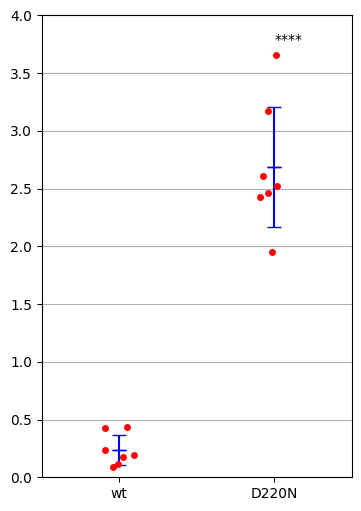

In [11]:
y = [np.mean(tau_wt), np.mean(tau_D)]
x = ['wt', 'D220N']
yerr = [np.std(tau_wt), np.std(tau_D)]

c = ['red']
sns.set_palette(c)

fig = plt.figure(figsize = (4, 6), dpi = 100)
ax0 = plt.subplot(1, 1, 1)

ax0.errorbar(x, y, yerr=yerr, capsize=5,  fmt = ' ', color = 'blue')
ax0.errorbar(x, y, yerr=np.zeros(2), capsize=5,  fmt = ' ', color = 'blue')

sns.stripplot(x=xwt, y=tau_wt)
sns.stripplot(x=xD, y=tau_D)

plt.grid(axis='y')
plt.xticks(rotation = 0)
plt.ylim(0, 4)

plt.text('D220N', 3.75, p_value(p), fontsize=10)

plt.show()